In [0]:
import sonnet_helper as sh
from HMM import unsupervised_HMM
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt

In [5]:
sonnets = sh.load_sonnet_text('shakespeare.txt')
dictionary = sh.get_dictionary(sonnets)
rhymes = sh.get_rhymes(sonnets)
seqs = sh.sonnets_to_seqs(sonnets,by_line = True)

file = open('8_state_50_iters.pkl','rb')
hmm = pkl.load(file)
A = np.array(hmm.A) #transition matrix
O = np.array(hmm.O) #observation matrix
"""There are 3205 observed word in shakespeare.txt, expressed in O (0 indexed).
There are then 8 hidden states"""
print(A)

[[7.85295681e-05 5.41254265e-13 3.71463960e-02 1.10429720e-01
  1.13084375e-08 8.52054346e-01 1.22087606e-12 2.90997352e-04]
 [2.15889380e-01 1.86856043e-13 3.56965204e-11 3.06252779e-01
  2.14254483e-11 1.26162447e-02 1.61664909e-20 4.65241597e-01]
 [1.60442487e-08 2.59002544e-01 1.25997299e-11 3.79372311e-08
  5.95913533e-13 4.69516946e-15 3.49145237e-08 7.40997367e-01]
 [2.83114299e-10 1.71294585e-05 1.21626307e-05 1.72580427e-11
  3.11967956e-01 8.88075561e-14 6.88002751e-01 1.33801589e-10]
 [2.92796730e-01 4.02272611e-12 1.38473491e-07 5.08368542e-10
  1.38902392e-10 3.31586062e-07 1.15120665e-03 7.06051592e-01]
 [1.95601272e-01 2.04696510e-07 1.27077062e-01 3.85665651e-01
  3.78102066e-02 2.49541184e-01 9.63450238e-10 4.30441848e-03]
 [4.73745356e-01 3.23501450e-02 3.75211994e-10 2.62836389e-01
  2.27786500e-01 3.28160768e-03 7.07853349e-16 2.61429214e-09]
 [1.01198500e-07 3.00323675e-01 3.82854523e-01 3.16821687e-01
  1.61044187e-13 9.76094638e-09 5.94928247e-14 4.19508395e-09]]

## Top 10 words implamentation

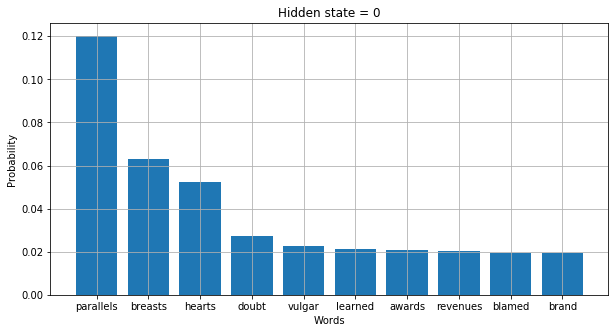

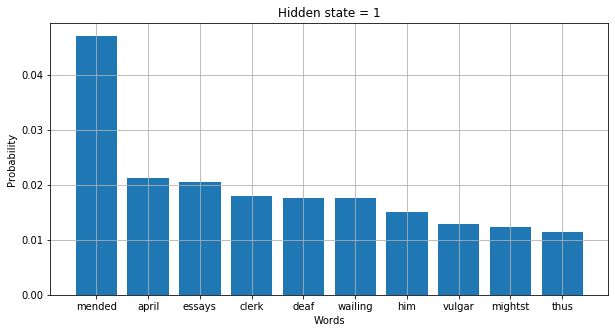

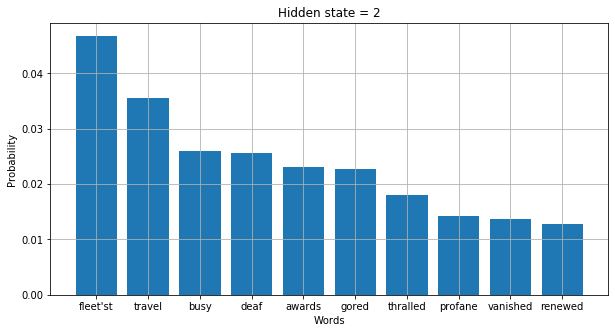

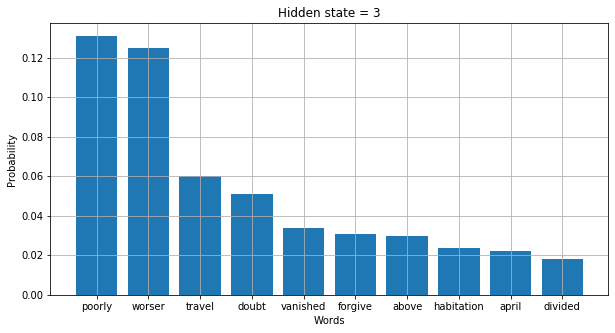

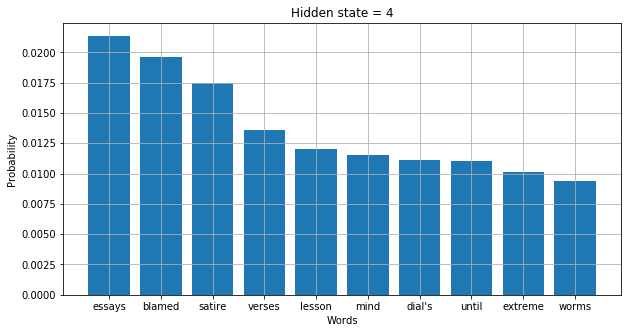

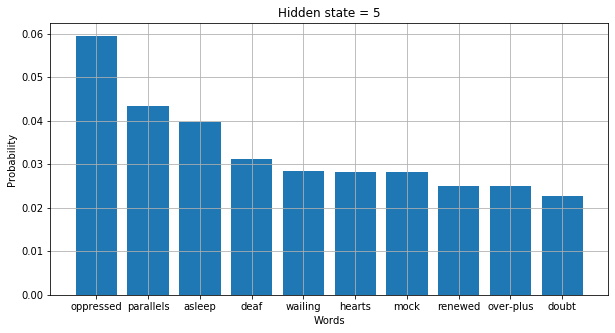

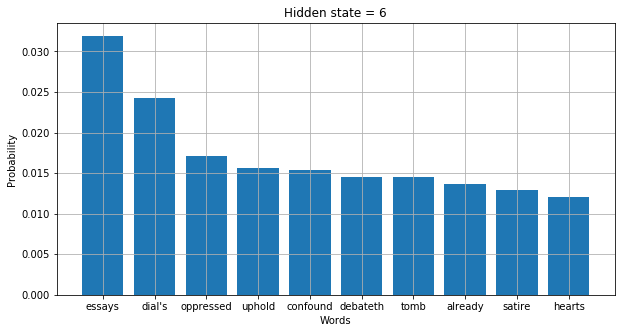

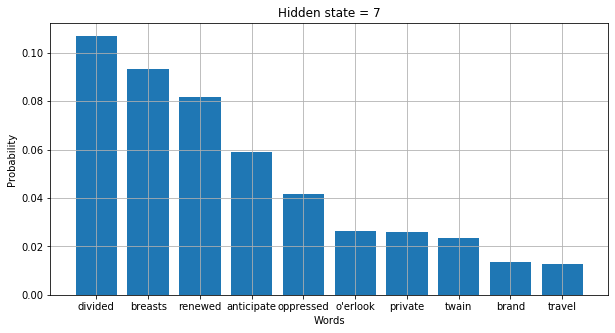

In [9]:
def top_10(O,dict,num_figs = 5):
  num_hidden = np.shape(O)[0]
  num_obs = np.shape(O)[1]
  #make a list to hold the 5 double lists
  top_10_lst = test = [[[],
        []] for _ in range(num_figs)]
  #loop through 5 hidden states
  for i in range(0,num_figs):
    #loop through everyword
    # for j in range(num_obs):
    #save the indexes of the top ten words in the top_10_lst for this hiddenstate
    top_10_lst[i][0] = list(O[i].argsort()[-10:][::-1])

    #loop through these top 10 words
    for k in range(10):
      #save the index
      word_index = top_10_lst[i][0][k]
      #and save the probablity of that word showing up
      top_10_lst[i][1].append(O[i][word_index])
      #Replace word indicies with the actual word
      V = top_10_lst[i][0][k]
      top_10_lst[i][0][k] = [key for key,value in dict.items() if value == V][0]
    ##### Produce a plot for each hidden index
    words = top_10_lst[i][0]
    probs = top_10_lst[i][1]
    plt.figure(figsize=(10,5))
    plt.title('Hidden state = %s' %i)
    plt.xlabel('Words')
    plt.ylabel('Probability')
    plt.bar(words , probs)
    plt.grid(True)
    plt.show()


def simp_A(A,max_A):
  num_hidden = len(A)
  new_A = np.zeros(np.shape(A))
  #only keep p > 1e-1
  if max_A == False:
    for i in range(num_hidden):
      for j in range(num_hidden):
        if A[i][j] > 1e-1:
          new_A[i][j] += A[i][j]
  #only keep the max
  elif max_A == True:
    for i in range(num_hidden):
      max_j = np.max(A[i])
      max_j_index = np.argmax(A[i])
      new_A[i][max_j_index] += A[i][max_j_index]

  return new_A
top_10(O,dictionary,num_figs = 8)

In [10]:
print(simp_A(A,True))

[[0.         0.         0.         0.         0.         0.85205435
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.4652416 ]
 [0.         0.         0.         0.         0.         0.
  0.         0.74099737]
 [0.         0.         0.         0.         0.         0.
  0.68800275 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.70605159]
 [0.         0.         0.         0.38566565 0.         0.
  0.         0.        ]
 [0.47374536 0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.38285452 0.         0.         0.
  0.         0.        ]]
